In [1]:
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
tracks_df1=pd.read_csv('SpotifyFeatures.csv')
tracks_df2=pd.read_csv('Spotify_Youtube.csv')
tracks_df1 = tracks_df1.rename(columns={'artist_name': 'Artist'})
tracks_df1 = tracks_df1.rename(columns={'track_name': 'Track'})
tracks_df1.head()
tracks_df=pd.merge(tracks_df1,tracks_df2, on=['Track','Artist'])
tracks_df.head()

,genre,Artist,Track,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,0.0,...,https://www.youtube.com/watch?v=ztQzHXMBe1g,Mary J. Blige - Be Without You (Kendu Mix),DJ Negraes,52677.0,856.0,7.0,NaN,False,False,162374584.0
1,Dance,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,64,0.083,0.724,246333,0.689,0.0,...,https://www.youtube.com/watch?v=ztQzHXMBe1g,Mary J. Blige - Be Without You (Kendu Mix),DJ Negraes,52677.0,856.0,7.0,NaN,False,False,162374584.0
2,Hip-Hop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,0.0,...,https://www.youtube.com/watch?v=ztQzHXMBe1g,Mary J. Blige - Be Without You (Kendu Mix),DJ Negraes,52677.0,856.0,7.0,NaN,False,False,162374584.0
3,Pop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,0.0,...,https://www.youtube.com/watch?v=ztQzHXMBe1g,Mary J. Blige - Be Without You (Kendu Mix),DJ Negraes,52677.0,856.0,7.0,NaN,False,False,162374584.0
4,Soul,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,0.0,...,https://www.youtube.com/watch?v=ztQzHXMBe1g,Mary J. Blige - Be Without You (Kendu Mix),DJ Negraes,52677.0,856.0,7.0,NaN,False,False,162374584.0


array([[<Axes: xlabel='acousticness', ylabel='acousticness'>,
        <Axes: xlabel='danceability', ylabel='acousticness'>,
        <Axes: xlabel='energy', ylabel='acousticness'>,
        <Axes: xlabel='instrumentalness', ylabel='acousticness'>,
        <Axes: xlabel='liveness', ylabel='acousticness'>,
        <Axes: xlabel='speechiness', ylabel='acousticness'>,
        <Axes: xlabel='tempo', ylabel='acousticness'>,
        <Axes: xlabel='valence', ylabel='acousticness'>],
       [<Axes: xlabel='acousticness', ylabel='danceability'>,
        <Axes: xlabel='danceability', ylabel='danceability'>,
        <Axes: xlabel='energy', ylabel='danceability'>,
        <Axes: xlabel='instrumentalness', ylabel='danceability'>,
        <Axes: xlabel='liveness', ylabel='danceability'>,
        <Axes: xlabel='speechiness', ylabel='danceability'>,
        <Axes: xlabel='tempo', ylabel='danceability'>,
        <Axes: xlabel='valence', ylabel='danceability'>],
       [<Axes: xlabel='acousticness', ylabel

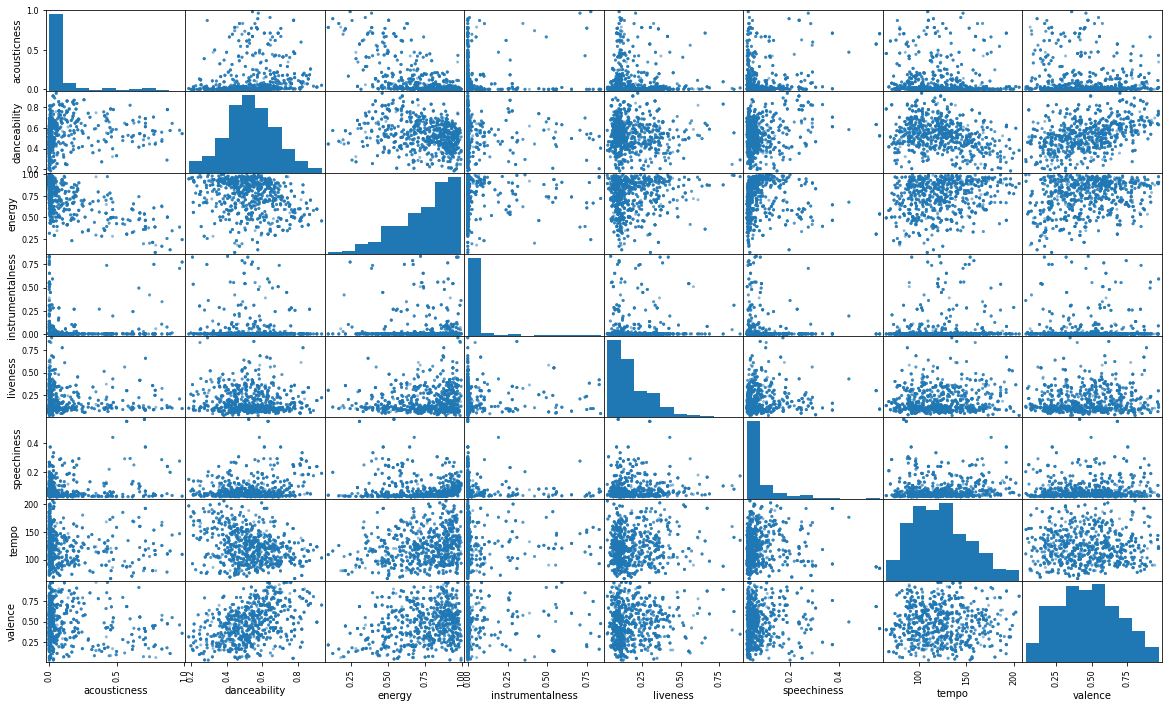

In [3]:
tracks_df=tracks_df.drop(tracks_df[tracks_df['popularity']<55].index ,axis='rows')
reduced_df=tracks_df[:2000]
pd.plotting.scatter_matrix(reduced_df[['acousticness','danceability','energy','instrumentalness','liveness','speechiness','tempo','valence']], figsize=( 20,12 ))

In [14]:
model=KMeans(n_clusters=50)
model.fit(tracks_df[['acousticness','danceability','energy','instrumentalness','liveness','speechiness','tempo','valence']])

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=50)

In [6]:
model.labels_

array([16, 16, 16, ..., 23, 33,  9])

In [7]:
tracks_df['type']=model.labels_
tracks_df
tracks_df.to_csv('result.csv')

In [9]:
tracks = pd.read_csv('result.csv')


tracks.head()

,Unnamed: 0.1,genre,Artist,Track,track_id,popularity,acousticness,danceability,duration_ms,energy,...,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,type
0,0,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,Mary J. Blige - Be Without You (Kendu Mix),DJ Negraes,52677.0,856.0,7.0,NaN,False,False,162374584.0,16
1,1,Dance,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,64,0.083,0.724,246333,0.689,...,Mary J. Blige - Be Without You (Kendu Mix),DJ Negraes,52677.0,856.0,7.0,NaN,False,False,162374584.0,16
2,2,Hip-Hop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,Mary J. Blige - Be Without You (Kendu Mix),DJ Negraes,52677.0,856.0,7.0,NaN,False,False,162374584.0,16
3,3,Pop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,Mary J. Blige - Be Without You (Kendu Mix),DJ Negraes,52677.0,856.0,7.0,NaN,False,False,162374584.0,16
4,4,Soul,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,Mary J. Blige - Be Without You (Kendu Mix),DJ Negraes,52677.0,856.0,7.0,NaN,False,False,162374584.0,16


In [12]:
from sklearn.utils import shuffle
url = ['https://www.youtube.com/watch?v=sJRPPUr1yic','https://www.youtube.com/watch?v=fJ9rUzIMcZQ','https://www.youtube.com/watch?v=Uhjws9V9PMo&list=LL&index=163&pp=gAQBiAQB8AUB','https://www.youtube.com/watch?v=siNFnlqtd8M&list=LL&index=125&pp=gAQBiAQB8AUB','https://www.youtube.com/watch?v=4PkcfQtibmU','https://www.youtube.com/watch?v=yKNxeF4KMsY','https://www.youtube.com/watch?v=2fngvQS_PmQ&list=LL&index=63&pp=gAQBiAQB','https://www.youtube.com/watch?v=n3nPiBai66M','https://www.youtube.com/watch?v=7jMlFXouPk8','https://www.youtube.com/watch?v=pHdJmDFYqTU','https://www.youtube.com/watch?v=QBGaO89cBMI&list=LL&index=11&pp=gAQBiAQB','https://www.youtube.com/watch?v=RzO7IGWGxu8&list=LL&index=12&pp=gAQBiAQB','https://www.youtube.com/watch?v=fHiGbolFFGw&list=LL&index=42&pp=gAQBiAQB','https://www.youtube.com/watch?v=1uYWYWPc9HU&list=LL&index=48&pp=gAQBiAQB','https://www.youtube.com/watch?v=BXkm6h6uq0k','https://www.youtube.com/watch?v=kXYiU_JCYtU']

favorites = tracks[tracks.Url_youtube.isin(url)]


cluster_numbers = list(favorites['type'])
clusters = {}
for num in cluster_numbers:
  clusters[num] = cluster_numbers.count(num)

user_favorite_cluster = [(k, v) for k, v in sorted(clusters.items(), key=lambda item: item[1])][0][0]

print('\nFavorite cluster:', user_favorite_cluster, '\n')

suggestions = tracks[tracks.type == user_favorite_cluster]

df = shuffle(suggestions)
new_url=df['Url_youtube']
new_url_str=new_url.iloc[0]
new_url_str


Favorite cluster: 4 



'https://www.youtube.com/watch?v=86URGgqONvA'